In [1]:
from cate.core.ds import DATA_STORE_REGISTRY
from cate.util import ConsoleMonitor
import cate.ops as ops

monitor = ConsoleMonitor()
cc = ops.open_dataset('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-17.AVHRR_NOAA.1-0.r1',
                      '2007-01-01',
                      '2007-12-31', sync=True, monitor=monitor)
oz = ops.open_dataset('esacci.OZONE.mon.L3.NP.multi-sensor.multi-platform.MERGED.fv0002.r1',
                      '2007-01-01',
                      '2007-12-21', sync=True, monitor=monitor)
cc_tot = ops.select_var(cc, 'cc_total')
oz_tot = ops.select_var(oz, 'O3_du_tot')
cc_tot_res = ops.coregister(oz_tot, cc_tot)

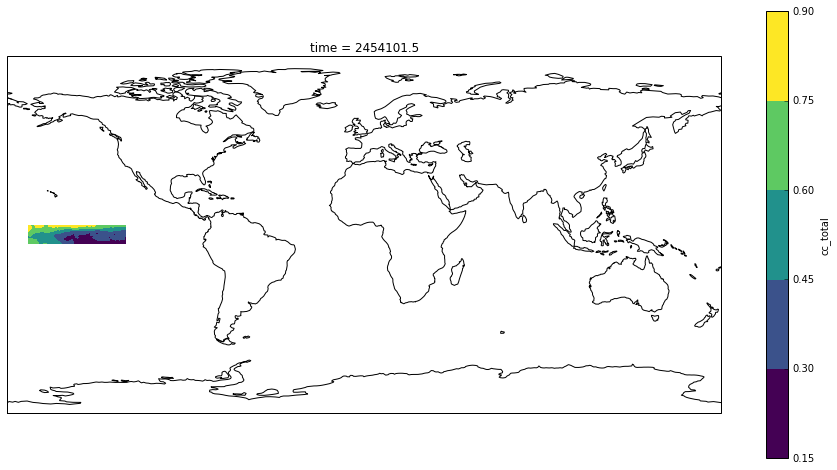

In [6]:
cc_tot_n34 = ops.subset_spatial(cc_tot_res, '-170, -5, -120, 5')
%matplotlib inline
ops.plot_map(cc_tot_n34, var='cc_total', time=0)

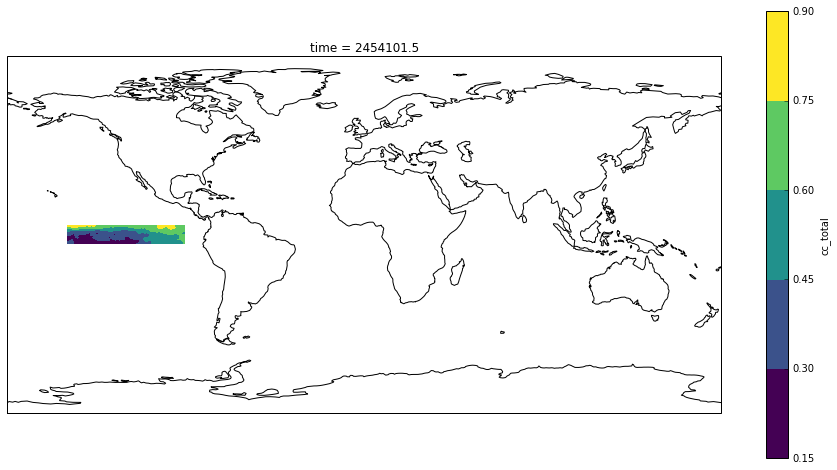

In [7]:
cc_tot_n3 = ops.subset_spatial(cc_tot_res, '-150, -5, -90, 5')
ops.plot_map(cc_tot_n3, var='cc_total', time=0)

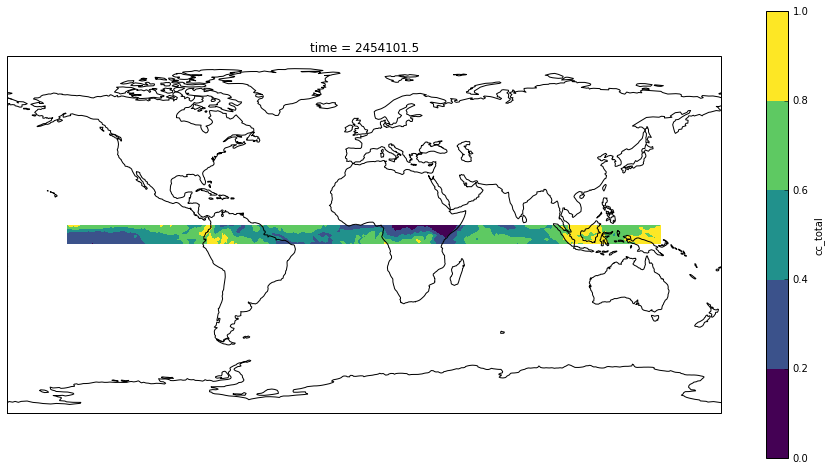

In [8]:
# Needs the changes from PR #157
cc_tot_n4 = ops.subset_spatial(cc_tot_res, '150, -5, -150, 5')
ops.plot_map(cc_tot_n4, var='cc_total', time=0)